# Part 1: Popularity Prediction on Twitter

A useful practice in social network analysis is to predict future popu-
larity of a subject or event.

Download training data from [here](https://ucla.box.com/s/nv9td9kvvfvg3tya0dlvbs1kn5o87gmv). This data is collected by querying popular hashtags to the 2015 Superbowl spanning a period from 2 weeks before the game to a week after the game. 

Twitter is a good platform to do such analysis. Given the current and previous hashtag tweet activity, can we predict the future activity of the hashtag? Let's explore. 

We will train a model on the data of such popular hashtags and predict the popularity of the given hashtag. We need to first prepare the data, extract features from the data and then fit the model. 

We will also deal with how to choose good features. 

We will test our model on testdata obtained from [here](https://ucla.box.com/s/ojvvthudugp9d2gze5nuep9ogwjydnur)
The test data consists of
tweets containing a hashtag in a specified time window, and we will use your model
to predict number of tweets containing the hashtag posted within one hour immediately
following the given time window.

The tweets are stored in separate files for different hashtags and files
are named as tweet_[#hashtag].txt 

Training data: The tweet file contains one tweet in each line and tweets are sorted with respect
to their posting time. Each tweet is a JSON string that you can load in Python as a
dictionary.

In [1]:
import json

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Let's explore data at first. 
I have loaded our files in Training_data folder. You can also do the same, since it helps keep our data sorted and there is no trouble in finding our file. 

In [29]:
#Extract data from the file.
#We will create a dictionary for the sake of not repeating the code for each hashtag. Later I will create a function to do this task for us.

hashtag_dictionary = {'#GoHawks' : 'tweets_#gohawks.txt',
                          '#GoPatriots' : 'tweets_#gopatriots.txt',
                          '#NFL' : 'tweets_#nfl.txt',
                          '#Patriots' : 'tweets_#patriots.txt',
                          '#SB49' : 'tweets_#sb49.txt',
                          '#SuperBowl' : 'tweets_#superbowl.txt'}

In [39]:
# Let's open the file with open command for #GoHawks hashtag
file_in = open('./Training_data/'+hashtag_dictionary['#GoHawks'], encoding="utf8")
## We need to provide encoding as utf8 else you'll receive an error as follows, when you try to load the file: 
### UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 3836: character maps to <undefined> ###

In [40]:
for line in file_in:
    data = json.loads(line)
    
data

{'firstpost_date': 1423304269,
 'title': "The ultimate broken hearted hangover week from hell (#SB49) is almost over. Listening to the blues still. We'll get'em in #SB50 #GOHAWKS",
 'url': 'http://twitter.com/carabear133/status/564005099874181122',
 'tweet': {'contributors': None,
  'truncated': False,
  'text': "The ultimate broken hearted hangover week from hell (#SB49) is almost over. Listening to the blues still. We'll get'em in #SB50 #GOHAWKS",
  'in_reply_to_status_id': None,
  'id': 564005099874181122,
  'favorite_count': 0,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'retweeted': False,
  'coordinates': None,
  'timestamp_ms': '1423304269175',
  'entities': {'symbols': [],
   'user_mentions': [],
   'trends': [],
   'hashtags': [{'indices': [53, 58], 'text': 'SB49'},
    {'indices': [122, 127], 'text': 'SB50'},
    {'indices': [128, 136], 'text': 'GOHAWKS'}],
   'urls': []},
  'in_reply_to_screen_name': None,
  'in_reply_to_user_id': None

#### You can look up the time a tweet is posted by the following command.

In [41]:
time_stamp_gohawk = data['citation_date']
time_stamp_gohawk

1423304269

### You can get the no. of followers of the person tweeting by looking at the data

In [43]:
followers_of_that_user = data['author']['followers']
followers_of_that_user

358.0

#### If you want to get the no of retweets for the tweet posted by him, we can do the following.

In [46]:
retweet_data = data['metrics']['citations']['total']
print(retweet_data)

# We can also get the username as follows
username_of = data['author']['nick']
username_of

1


'carabear133'

## Calculate the following for #GoHawks

* Average number of tweets per hour
* Average number of followers of users posting the tweets
* Average number of retweets.

In [48]:
#Creating list for time_stamps, no of followers, no of retweets. Dict for followers of users.
time_stamps = []
no_of_followers = []
no_of_retweets = []
followers_of_users = dict([])

In [50]:
file_in = open('./Training_data/'+hashtag_dictionary['#GoHawks'], encoding="utf8")
for line in file_in:
        tr_data = json.loads(line)
        time_stamps.append(tr_data['citation_date'])
        no_of_followers.append(tr_data['author']['followers'])
        no_of_retweets.append(tr_data['metrics']['citations']['total'])
        
        username = tr_data['author']['nick']
        if username in followers_of_users:
            followers_of_users[username].append(tr_data['author']['followers'])
        else:
            followers_of_users[username] = [tr_data['author']['followers']]

file_in.close()

In [62]:
#print(f'time_stamp:{time_stamps}')
#print(f'no of followers: {no_of_followers}')
#print(f'no of retweets: {no_of_retweets}')
#print(f'followers of users dict: {followers_of_users}')

In [64]:
#Total no of tweets
total_no_of_tweets = float(len(time_stamps))
#No of hours passed
no_of_hours_passed = float(max(time_stamps)-min(time_stamps))/3600.0
#If you take a peak at followers of users data, same no. has been repeated
followers = []
for user in followers_of_users:
    followers.append(float(sum(followers_of_users[user]))/float(len(followers_of_users[user])))
#Total no of retweets
total_no_of_retweets = float(sum(no_of_retweets))

## Results

In [65]:
print('\n------------------------------------------------------------\n')
print('The statistics for', '#GoHawks')
print('    Total number of tweets:', total_no_of_tweets)
print('    Total number of users:', len(followers))
print('    Average number of tweets (per hour):', total_no_of_tweets/no_of_hours_passed)
print('    Average number of followers of users:', sum(followers)/len(followers))
print('    Average number of retweets:', total_no_of_retweets/total_no_of_tweets)


------------------------------------------------------------

The statistics for #GoHawks
    Total number of tweets: 188136.0
    Total number of users: 77584
    Average number of tweets (per hour): 325.37159130433116
    Average number of followers of users: 1588.1886629300582
    Average number of retweets: 2.014617085512608


## We will plot now the histogram for the no of tweets in hour over time

In [68]:
no_of_hours = int((max(time_stamps)-min(time_stamps))/3600+1)
hourly_tweet_count = [0] * no_of_hours

In [69]:
## We want to get the data of no of tweets per hour.
start_time = min(time_stamps)
for time_stamp in time_stamps:
    hourly_tweet_count[int((time_stamp-start_time)/3600)] += 1

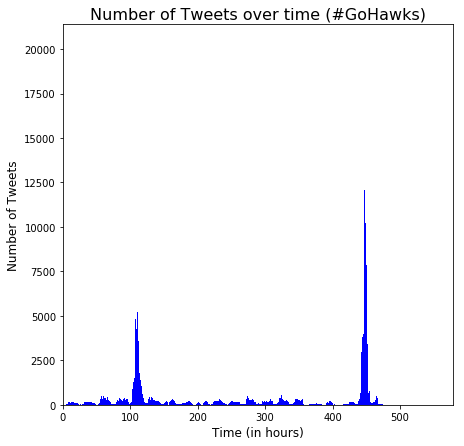

In [72]:
plt.figure(figsize = (7,7))
plt.bar([i for i in range(0,len(hourly_tweet_count))], hourly_tweet_count, 1, align='edge', color = 'blue') #height = hourly_tweet_count, width = 1
no_of_hours_passed = float(max(time_stamps)-min(time_stamps))/3600.0
plt.axis([0,no_of_hours_passed+1,0,int(max(hourly_tweet_count)*1.03)])
plt.xlabel('Time (in hours)', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.title('Number of Tweets over time (' + '#GoHawks' + ')', fontsize = 16)
plt.show()  

We did this calculation for #GoHawks. We need to do this for all hashtags. It's very inconvenient to repeat all the steps above just for all hashtags. We will create functions for doing this. (Python, you're great!)

## Calculating all data for all hashtags

#### Histogram plot

In [73]:
#-----------------------------Function to plot histogram-----------------------
def histogram(time_stamps, hashtag):
    hourly_tweet_count = [0] * int((max(time_stamps)-min(time_stamps))/3600+1)
    start_time = min(time_stamps)
    for time_stamp in time_stamps:
        hourly_tweet_count[int((time_stamp-start_time)/3600)] += 1
           
    plt.figure(figsize = (7,7))
    plt.bar([i for i in range(0,len(hourly_tweet_count))], hourly_tweet_count, 1, align='edge', color = 'blue')
    no_of_hours_passed = float(max(time_stamps)-min(time_stamps))/3600.0
    plt.axis([0,no_of_hours_passed+1,0,int(max(hourly_tweet_count)*1.03)])
    plt.xlabel('Time (in hours)', fontsize = 12)
    plt.ylabel('Number of Tweets', fontsize = 12)
    plt.title('Number of Tweets over time (' + hashtag + ')', fontsize = 16)
    plt.show()  
#------------------------------------------------------------------------------ 

## Calculate the following

* Average number of tweets per hour
* Average number of followers of users posting the tweets
* Average number of retweets.

In [75]:
#----------Function to calculate the required stats for each hashtag-----------
def calculate_stats(hashtag):
    hashtag_dictionary = {'#GoHawks' : 'tweets_#gohawks.txt',
                          '#GoPatriots' : 'tweets_#gopatriots.txt',
                          '#NFL' : 'tweets_#nfl.txt',
                          '#Patriots' : 'tweets_#patriots.txt',
                          '#SB49' : 'tweets_#sb49.txt',
                          '#SuperBowl' : 'tweets_#superbowl.txt'}
    
    time_stamps = []
    no_of_followers = []
    no_of_retweets = []
    followers_of_users = dict([])
    
    #--------------------To extract the data from the file-------------------
    file_in = open('./Training_data/'+hashtag_dictionary[hashtag], encoding="utf8")
    for line in file_in:
        tr_data = json.loads(line)
        time_stamps.append(tr_data['citation_date'])
        no_of_followers.append(tr_data['author']['followers'])
        no_of_retweets.append(tr_data['metrics']['citations']['total'])
        
        username = tr_data['author']['nick']
        if username in followers_of_users:
            followers_of_users[username].append(tr_data['author']['followers'])
        else:
            followers_of_users[username] = [tr_data['author']['followers']]

    file_in.close()
    
    #--------------------To calculate the related parameters-------------------
    total_no_of_tweets = float(len(time_stamps))
    
    no_of_hours_passed = float(max(time_stamps)-min(time_stamps))/3600.0
    
    followers = []
    for user in followers_of_users:
        followers.append(float(sum(followers_of_users[user]))/float(len(followers_of_users[user])))
        
    total_no_of_retweets = float(sum(no_of_retweets))
    
    #----------------------------To print the results--------------------------
    print('\n------------------------------------------------------------\n')
    print('The statistics for', hashtag)
    print('    Total number of tweets:', total_no_of_tweets)
    print('    Total number of users:', len(followers))
    print('    Average number of tweets (per hour):', total_no_of_tweets/no_of_hours_passed)
    print('    Average number of followers of users:', sum(followers)/len(followers))
    print('    Average number of retweets:', total_no_of_retweets/total_no_of_tweets)
    
    # We will plot histogram for #NFL, #SuperBowl. No particular reason.
    if hashtag in ['#NFL', '#SuperBowl']:
        histogram(time_stamps, hashtag)
    


------------------------------------------------------------

The statistics for #GoHawks
    Total number of tweets: 188136.0
    Total number of users: 77584
    Average number of tweets (per hour): 325.37159130433116
    Average number of followers of users: 1588.1886629300582
    Average number of retweets: 2.014617085512608

------------------------------------------------------------

The statistics for #GoPatriots
    Total number of tweets: 26232.0
    Total number of users: 18087
    Average number of tweets (per hour): 45.69451057356203
    Average number of followers of users: 1294.4693664626748
    Average number of retweets: 1.4000838670326319

------------------------------------------------------------

The statistics for #NFL
    Total number of tweets: 259024.0
    Total number of users: 75642
    Average number of tweets (per hour): 441.3234311373958
    Average number of followers of users: 4221.076987865717
    Average number of retweets: 1.5385331089011056


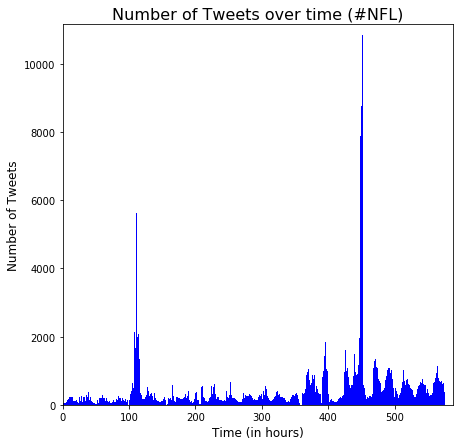


------------------------------------------------------------

The statistics for #Patriots
    Total number of tweets: 489713.0
    Total number of users: 327326
    Average number of tweets (per hour): 834.5555091641886
    Average number of followers of users: 1695.2710621477224
    Average number of retweets: 1.7828156491659402

------------------------------------------------------------

The statistics for #SB49
    Total number of tweets: 826951.0
    Total number of users: 590636
    Average number of tweets (per hour): 1419.8879074871902
    Average number of followers of users: 2250.850257742912
    Average number of retweets: 2.5111487863247035

------------------------------------------------------------

The statistics for #SuperBowl
    Total number of tweets: 1348767.0
    Total number of users: 693087
    Average number of tweets (per hour): 2302.5004018833274
    Average number of followers of users: 3798.679117085927
    Average number of retweets: 2.3882723999030224


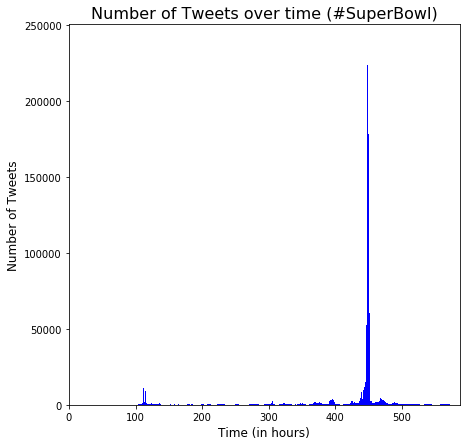

In [76]:
calculate_stats('#GoHawks')
calculate_stats('#GoPatriots')
calculate_stats('#NFL')
calculate_stats('#Patriots')
calculate_stats('#SB49')
calculate_stats('#SuperBowl')

# Linear regression model


We will now use a linear regression model to predict the number of tweets in the next hour, if we are
given the following 5 attributes extracted from the tweets in the previous hour:
* Number of tweets
* Total number of retweets
* Sum of the number of followers of the users posting the hashtag
* Maximum number of followers of the users posting the hashtag
* Time of the day

### We will first apply Linear Regression model for hashtag #GoHawks.

This is for understanding purposes. We will also analyse the model's performance.

#### Importing required libraries

In [78]:
import os # to create directory/folder
import json #to load data
import math # to find square root
import numpy as np # to create array
import pandas as pd # to read csv files
from pandas import DataFrame #to create dataframe
import statsmodels.api as sm #to give ordinary least squares summary report
from sklearn.metrics import mean_squared_error #straightforward
from sklearn.linear_model import LinearRegression #That's the purpose

In [80]:
#This is a dictionary whose keys are hashtags and values are a list of txt file and the total no of tweets
hashtag_dictionary = {'#GoHawks' : ['tweets_#gohawks.txt', 188136],
                          '#GoPatriots' : ['tweets_#gopatriots.txt', 26232],
                          '#NFL' : ['tweets_#nfl.txt', 259024],
                          '#Patriots' : ['tweets_#patriots.txt', 489713],
                          '#SB49' : ['tweets_#sb49.txt', 826951],
                          '#SuperBowl' : ['tweets_#superbowl.txt', 1348767]}

# We need to find the number of tweets per hour, total number of tweets per hour, Sum of the number of followers of 
#the users posting the hashtag per hour, Maximum number of followers of the users posting the hashtag per hour, Time of the day

# We can first get the timestamp data, no of followers of users data. Retweet data will be obtained if tweet username and retweet
# username are different.

# Timestamp list will be the size of no of tweets.
time_stamps = [0]*hashtag_dictionary['#GoHawks'][1]
# is_retweet boolean list
is_retweet = [False]*hashtag_dictionary['#GoHawks'][1]
# You can easily fill the followers data.
followers_of_users = [0]*hashtag_dictionary['#GoHawks'][1]

#-----------------------To extract the data from the file------------------
file_in = open('./Training_data/'+hashtag_dictionary['#GoHawks'][0], encoding="utf8") #We already know why encoding is must.


for (line, index) in zip(file_in, range(0, hashtag_dictionary['#GoHawks'][1])): #(line, index) tuple is created using zip.
    tr_data = json.loads(line) #Load data
    time_stamps[index] = tr_data['citation_date'] #for each index of list, timestamp is recorded.
    followers_of_users[index] = tr_data['author']['followers'] #for each tweet posted by the user at that timestamp,
                                                                #what's no of followers?
    
    username = tr_data['author']['nick']  #Take a peak at the data
    original_username = tr_data['original_author']['nick']
    if username != original_username:
        is_retweet[index] = True #We can add it later on.
        
file_in.close()

In [92]:
#No of hours passed is actually (max-min)/3600, but we will pass this value in range's stop value.
no_of_hrs_passed = int((max(time_stamps)-min(time_stamps))/3600)+1 #579
#No of tweets per hour. For that particular timestamp-min(timestamp) hour as index of the below list, add +1 as count value.
hr_no_of_tweets = [0] * no_of_hrs_passed
# If is_retweet == True, add +1 as count value 
hr_no_of_retweets = [0] * no_of_hrs_passed
# Sum of followers per hour
hr_sum_of_followers = [0] * no_of_hrs_passed
# Max no of followers, that can be found using if statement
hr_max_no_of_followers = [0] * no_of_hrs_passed  
# Use %24
hr_time_of_the_day = [0] * no_of_hrs_passed

#Base timestamp
start_time = min(time_stamps)

for i in range(0, hashtag_dictionary['#GoHawks'][1]):
    #Current hour will be the index for the above lists.
    current_hr = int((time_stamps[i]-start_time)/3600)
    #Count tweet value for each hour.
    hr_no_of_tweets[current_hr] += 1
    
    #Count as retweet only if is_retweet == True (When username and original username are different)
    if is_retweet[i]:
        hr_no_of_retweets[current_hr] += 1
    
    #Add followers of users data for each i value out of 188136 to the place whose index is current hour
    hr_sum_of_followers[current_hr] += followers_of_users[i]
    
    # straightforward logic:
    if followers_of_users[i] > hr_max_no_of_followers[current_hr]:
        hr_max_no_of_followers[current_hr] = followers_of_users[i]
    
for i in range(0, len(hr_time_of_the_day)):
    hr_time_of_the_day[i] = i%24 # 0 to 24
    

###  Extracting data

In [24]:
def extract_info(hashtag):
    hashtag_dictionary = {'#GoHawks' : ['tweets_#gohawks.txt', 188136],
                          '#GoPatriots' : ['tweets_#gopatriots.txt', 26232],
                          '#NFL' : ['tweets_#nfl.txt', 259024],
                          '#Patriots' : ['tweets_#patriots.txt', 489713],
                          '#SB49' : ['tweets_#sb49.txt', 826951],
                          '#SuperBowl' : ['tweets_#superbowl.txt', 1348767]}
    
    time_stamps = [0]*hashtag_dictionary[hashtag][1]
    is_retweet = [False]*hashtag_dictionary[hashtag][1]
    followers_of_users = [0]*hashtag_dictionary[hashtag][1]
    
    #-----------------------To extract the data from the file------------------
    file_in = open('./Training_data/'+hashtag_dictionary[hashtag][0], encoding="utf8")
    for (line, index) in zip(file_in, range(0, hashtag_dictionary[hashtag][1])):
        tr_data = json.loads(line)
        time_stamps[index] = tr_data['citation_date']
        followers_of_users[index] = tr_data['author']['followers']

        username = tr_data['author']['nick']
        original_username = tr_data['original_author']['nick']
        if username != original_username:
            is_retweet[index] = True
        
    file_in.close()
    
    #--------------------To calculate the related parameters-------------------
    no_of_hrs_passed = int((max(time_stamps)-min(time_stamps))/3600)+1
    hr_no_of_tweets = [0] * no_of_hrs_passed
    hr_no_of_retweets = [0] * no_of_hrs_passed
    hr_sum_of_followers = [0] * no_of_hrs_passed
    hr_max_no_of_followers = [0] * no_of_hrs_passed
    hr_time_of_the_day = [0] * no_of_hrs_passed
    
    start_time = min(time_stamps)
    
    for i in range(0, hashtag_dictionary[hashtag][1]):
        current_hr = int((time_stamps[i]-start_time)/3600)
        hr_no_of_tweets[current_hr] += 1
        
        if is_retweet[i]:
            hr_no_of_retweets[current_hr] += 1
                                      
        hr_sum_of_followers[current_hr] += followers_of_users[i]
    
        if followers_of_users[i] > hr_max_no_of_followers[current_hr]:
            hr_max_no_of_followers[current_hr] = followers_of_users[i]
    
    for i in range(0, len(hr_time_of_the_day)):
        hr_time_of_the_day[i] = i%24
    
    #------------------To build the DataFrame and save it to file--------------
    target = hr_no_of_tweets[1:]
    target.append(0)
    
    data = np.array([hr_no_of_tweets,
                     hr_no_of_retweets,
                     hr_sum_of_followers,
                     hr_max_no_of_followers,
                     hr_time_of_the_day,
                     target])
    data = np.transpose(data)
    
    data_frame = DataFrame(data)
    data_frame.columns = ['no_of_tweets', 
                          'no_of_retweets', 
                          'sum_of_followers',
                          'max_no_of_followers',
                          'time_of_the_day',
                          'target']
    
    if os.path.isdir('./Extracted_data'):
        pass
    else:
        os.mkdir('./Extracted_data')

    data_frame.to_csv('./Extracted_data/data_'+hashtag+'.csv', index = False)   
#------------------------------------------------------------------------------      


### Linear regression function for each hashtag

In [25]:

#-------------------Function to perform Linear Regression----------------------
def linear_regression(hashtag):
    training_data = pd.read_csv('./Extracted_data/data_'+hashtag+'.csv')
    
    #----------------------------One-hot Encoding------------------------------
    time_of_day_set = range(0,24)
    for time_of_day in time_of_day_set:
        time_of_day_column_to_add = []
        for time_of_day_item in training_data['time_of_the_day']:
            if time_of_day_item == time_of_day:
                time_of_day_column_to_add.append(1)
            else:
                time_of_day_column_to_add.append(0)
        training_data.insert(training_data.shape[1]-1,
                             str(time_of_day)+'th_hour',
                             time_of_day_column_to_add)
        
    #---------------------------Linear Regression------------------------------
    training_data.drop('time_of_the_day', 1, inplace = True)
    target_data = training_data.pop('target')
    
    lin_reg = LinearRegression(fit_intercept = False)
    lin_reg_result = lin_reg.fit(training_data, target_data)
    
    predicted_values = lin_reg_result.predict(training_data)
    
    print('R-squared measure:') 
    print(lin_reg_result.score(training_data, target_data))
    print('RMSE:')
    print(math.sqrt(mean_squared_error(target_data,predicted_values)))

    #-----------------------------To perform the t-test------------------------
    model = sm.OLS(target_data, training_data)
    results = model.fit()
    print(results.summary())

#------------------------------------------------------------------------------      
    

### Performing linear regression

In [26]:
def perform_linear_regression(hashtag):
    print('-------------------------------------------------------')
    print('Processing the hashtag "' + hashtag + '".\n')
    extract_info(hashtag)
    linear_regression(hashtag)

In [27]:
perform_linear_regression('#GoHawks')
perform_linear_regression('#GoPatriots')
perform_linear_regression('#NFL')
perform_linear_regression('#Patriots')
perform_linear_regression('#SB49')
perform_linear_regression('#SuperBowl')

-------------------------------------------------------
Processing the hashtag "#GoHawks".

R-squared measure:
0.5319363909601449
RMSE:
910.9921996805795
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     23.19
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           1.44e-73
Time:                        18:44:44   Log-Likelihood:                -4767.2
No. Observations:                 579   AIC:                             9590.
Df Residuals:                     551   BIC:                             9712.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t    

R-squared measure:
0.584841893065233
RMSE:
567.10528140252
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     29.17
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           7.38e-89
Time:                        18:45:47   Log-Likelihood:                -4554.8
No. Observations:                 587   AIC:                             9166.
Df Residuals:                     559   BIC:                             9288.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

R-squared measure:
0.8565548094755735
RMSE:
3799.8433322883748
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 27 Mar 2019   Prob (F-statistic):          3.81e-214
Time:                        18:51:12   Log-Likelihood:                -5632.7
No. Observations:                 583   AIC:                         1.132e+04
Df Residuals:                     555   BIC:                         1.144e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------